In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
r = requests.get('https://www.nytimes.com/interactive/2021/04/03/us/anti-asian-attacks.html?searchResultPosition=9')

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
results=soup.find_all('div',attrs={'class':['incident_line covidn','incident_line covidy']})

In [3]:
"""Scraping data"""
records = []
for result in results:
    location=result.find('div',attrs ={'class':'meta metalg'}).text[17:-12]
    description = result.find('span', attrs = {'class':'description_text'}).text
    url=result.find('a')['href']
    records.append((location, description, url))

In [4]:
df = pd.DataFrame(records, columns=['location','description','url'])

In [5]:
df.head()

,location,description,url
0,Chicago,A 60-year-old Chinese-American man out for a r...,https://www.wbez.org/stories/asian-americans-i...
1,Manhattan,A 59-year-old man was kicked in the back and t...,https://nypost.com/2020/03/11/asian-man-is-vic...
2,Bronx,A 52-year-old woman on a bus was attacked by a...,https://www.nytimes.com/2021/03/18/nyregion/as...
3,Queens,A 47-year-old man and his 10-year-old son were...,https://nypost.com/2020/03/14/asian-man-son-ha...
4,Manhattan,A 34-year-old woman was attacked on the street...,https://pix11.com/news/coronavirus/woman-assau...


In [6]:
"""Extracting URL outlet name, adding outlet name column"""
df['outlet name']=df['url'].apply(lambda x:x.split('/')[2])
df.head(5)

,location,description,url,outlet name
0,Chicago,A 60-year-old Chinese-American man out for a r...,https://www.wbez.org/stories/asian-americans-i...,www.wbez.org
1,Manhattan,A 59-year-old man was kicked in the back and t...,https://nypost.com/2020/03/11/asian-man-is-vic...,nypost.com
2,Bronx,A 52-year-old woman on a bus was attacked by a...,https://www.nytimes.com/2021/03/18/nyregion/as...,www.nytimes.com
3,Queens,A 47-year-old man and his 10-year-old son were...,https://nypost.com/2020/03/14/asian-man-son-ha...,nypost.com
4,Manhattan,A 34-year-old woman was attacked on the street...,https://pix11.com/news/coronavirus/woman-assau...,pix11.com


Extracting victim age from crime description where age was mentioned

In [7]:
df['age']=df['description'].apply(lambda x:x.split('-')[0]).str.replace(r'\A','')
df['age']=df['age'].str.replace(r'\D','')
df['age']=(df['age'].replace(r'^\s*$', np.nan, regex=True))


Top 5 locations where hate crimes were reported

In [8]:
top_five=df['location'].value_counts().head(5)
print(top_five)

Manhattan      24
Los Angeles     9
Brooklyn        7
Queens          7
Seattle         5
Name: location, dtype: int64


Graphing locations with occurences

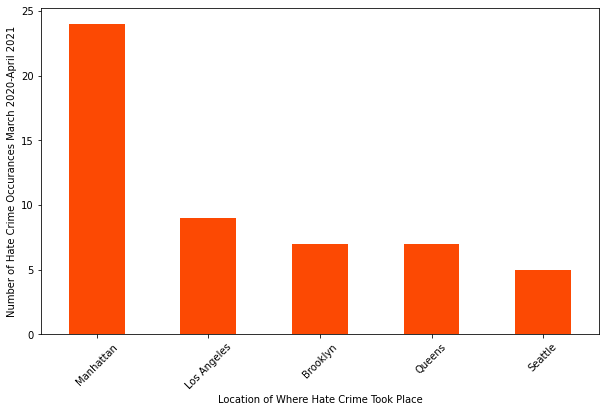

In [9]:
"""Bar Chart of top five locations"""
plt.figure(figsize=(10,6))
ax=top_five.plot.bar(color='#fc4903',x='Location', rot=0)
plt.xticks(rotation = 45)
plt.ylabel("Number of Hate Crime Occurances March 2020-April 2021")
plt.xlabel("Location of Where Hate Crime Took Place")
plt.show()

Graphing frequency of reporting by online news outlets

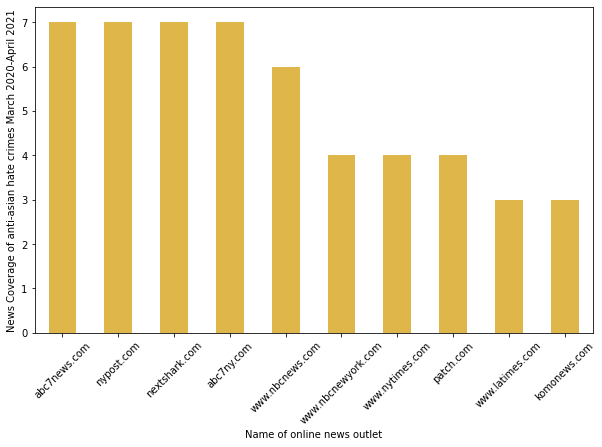

In [10]:
top_ten_outlets=df['outlet name'].value_counts().head(10)

plt.figure(figsize=(10,6))
ax=top_ten_outlets.plot.bar(color='#deb649',x='outlet name', rot=0)
plt.xticks(rotation = 45)
plt.ylabel("News Coverage of anti-asian hate crimes March 2020-April 2021")
plt.xlabel("Name of online news outlet")
plt.show()

Number of crimes where the victim was spat on

In [11]:
spitting=df[df['description'].str.contains('spit')]
print(f"Overall {len(spitting)} crimes involved the victim being spat on")

Overall 9 crimes involved the victim being spat on


Anti-Asian attacks with referenced to the coronavirus

In [12]:
virus_mentions=df[df['description'].str.contains('virus')
                  |df['description'].str.contains('infect') 
                  |df['description'].str.contains('sanitizer') 
                  |df['description'].str.contains('mask') 
                  |df['description'].str.contains('corona') 
                  |df['description'].str.contains('pandemic') 
                  |df['description'].str.contains('disease')
                  |df['description'].str.contains('Wuhan')
                  |df['description'].str.contains('covid')
                  |df['description'].str.contains('COVID')
                  |df['description'].str.contains('fault')
                  |df['description'].str.contains('dirty')
                 |df['description'].str.contains('flu')]
print(f'In total {len(virus_mentions)} attacks involved reference to the coronavirus')

In total 48 attacks involved reference to the coronavirus


Number of attacks involving racist rhetoic coined by Donald Trump

In [13]:
trump_rhetoric = df[df['description'].str.contains('kung flu')
                  |df['description'].str.contains('China virus')]
print(f"{len(trump_rhetoric)} instances of hate crime involved racist rhetoric coined by Donald Trump")

3 instances of hate crime involved racist rhetoric coined by Donald Trump


Finding age of the oldest victim

In [14]:
"""Converting age column from str to int to find out the oldest victim"""
df['new_age']=df.age.fillna(0)
df['new_age']=df.new_age.astype(int)
df['new_age']=df.new_age.mask(df['new_age']>100,0) 
oldest_victim_age=df.new_age.max()
print(f'The oldest victime chronicaled in the NYT article was {oldest_victim_age}')

The oldest victime chronicaled in the NYT article was 68
